# LIVE 5: Problems in Python [String and Regex - 2nd session]
#   - Focus: basic of String and regex in python + interesting prblem solving.
#   - Prereq : Basic knowledge of string and regex in python + previous code- sessions.

In [2]:
#  Problem 2: Extra data from a PDF invoice
#   - Assume the format is fixed.
#   - Get a PDF , extract predefined key fields from this PDF

In [1]:
!pip3 install PyPDF4

     ---------------------------------------- 0.0/63.9 kB ? eta -:--:--
     ------ --------------------------------- 10.2/63.9 kB ? eta -:--:--
     ------------------ ------------------- 30.7/63.9 kB 325.1 kB/s eta 0:00:01
     -------------------------------------- 63.9/63.9 kB 429.5 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for PyPDF4: filename=PyPDF4-1.27.0-py3-none-any.whl size=61238 sha256=b916aef1828e02a1271a42b607ca94437b0250f57d10236e0f272fa44d40036a
  Stored in directory: c:\users\ompra\appdata\local\pip\cache\wheels\ec\90\9c\f1815a3c733075db80497b42b70cc33f620ee7e3076bffbf77
Successfully built PyPDF4



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import PyPDF4

FILE_PATH = 'D:\LEARNING\sample.pdf'

with open(FILE_PATH, 'rb') as f:
    reader = PyPDF4.PdfFileReader(f)
    
    page = reader.getPage(0) # get the page number
    # print(page.extractText()) # then extract the everything in that page .
    txt = page.extractText()

Invoice
Payment is due within 30 days from date of invoice. Late payment is subject to fees of 5% per month.
Thanks for choosing 
DEMO - Sliced Invoices
 | 
admin@slicedinvoices.com
Page 1/1
From:
DEMO - Sliced Invoices
Suite 5A-1204
123 Somewhere Street
Your City AZ 12345
admin@slicedinvoices.com
Invoice Number
INV-3337
Order Number
12345
Invoice Date
January 25, 2016
Due Date
January 31, 2016
Total Due
$93.50
To:
Test Business
123 Somewhere St
Melbourne, VIC 3000
test@test.com
Hrs/Qty
Service
Rate/Price
Adjust
Sub Total
1.00
Web Design
This is a sample description...
$85.00
0.00%
$85.00
Sub Total
$85.00
Tax
$8.50
Total
$93.50
ANZ Bank
ACC # 1234 1234
BSB # 4321 432
Paid



In [5]:
# Extract amounts
import re # regular expression
m = re.findall("\$[0-9]*\.[0-9]*", txt)
print(m)

['$93.50', '$85.00', '$85.00', '$85.00', '$8.50', '$93.50']


In [6]:
# Extract Total Due:
import re 
m = re.findall("Total Due\n\$[0-9]*\.[0-9]*", txt) # for total amount due
print(m)

['Total Due\n$93.50']


In [ ]:
# Extract dates in this doc given a fixed format using line number
import re
result = re.split("\n", txt) # all txt line who separate by \n
print(result)

print("\n\n Invoice date:" + result[18]) # from the line 18 

['Invoice', 'Payment is due within 30 days from date of invoice. Late payment is subject to fees of 5% per month.', 'Thanks for choosing ', 'DEMO - Sliced Invoices', ' | ', 'admin@slicedinvoices.com', 'Page 1/1', 'From:', 'DEMO - Sliced Invoices', 'Suite 5A-1204', '123 Somewhere Street', 'Your City AZ 12345', 'admin@slicedinvoices.com', 'Invoice Number', 'INV-3337', 'Order Number', '12345', 'Invoice Date', 'January 25, 2016', 'Due Date', 'January 31, 2016', 'Total Due', '$93.50', 'To:', 'Test Business', '123 Somewhere St', 'Melbourne, VIC 3000', 'test@test.com', 'Hrs/Qty', 'Service', 'Rate/Price', 'Adjust', 'Sub Total', '1.00', 'Web Design', 'This is a sample description...', '$85.00', '0.00%', '$85.00', 'Sub Total', '$85.00', 'Tax', '$8.50', 'Total', '$93.50', 'ANZ Bank', 'ACC # 1234 1234', 'BSB # 4321 432', 'Paid', '']


 Invoice date:January 25, 2016


In [ ]:
# NOTE : Web-scarping
#   - We can use "re" for extracting data from web-scaring.
#   - But, it is better to use 'beautiful-soup' like libraries as they use the structure of html
#   - We have done an earlier live session on web-scarping :...link

In [ ]:
# Exercise Qno: how do we handle cases where we want to extract data from multiple invoice formats?
#   - Assignment Extract email-addresses form the PDF

import re 
from PyPDF4 import PdfFileReader

def extract_emails_from_pdf(FILE_PATH):
    emails = set()
    with open(FILE_PATH, "rb") as f:
        reader = PdfFileReader(f)
        for page_num in range(reader.getNumPages()):
            text = reader.getPage(page_num).extractText()
            found = re.findall(r"[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}", text)
            emails.update(found)
    return list(emails)

# Example usage
pdf_file = "sample.pdf"
emails = extract_emails_from_pdf(FILE_PATH)
print("Extracted Emails:", emails)

Extracted Emails: ['test@test.com', 'admin@slicedinvoices.com']


In [ ]:
# Problem 3: Check if a String is a valid integer or float ?
# TRUE : 12, 12.5, 1e10, 1e+6, 1e-10, -2.3, -2.4e-4
# FALSE : abc , -2.4e45, 1b2.4
# TRICKLY : Handle all the cases carefully.

# Easy problem to code. but, hard not to miss cases.
# Popular interview question to understand handling boundary cases.

In [ ]:
# Explanatory comments are very important in your code.
# add more comments and clearly listed cases handled for better interpretability.


# The code eliminates each of the FALSE cases and finally limits to only TRUE cases.
# is a valid number
def valid_num(str):
    i = 0
    j = len(str)-1

    # handling whitespaces: "    123    "
    while i < len(str) and str[i] == ' ': # remove whitespace in the beginning 
        i += 1

    while j >= 0 and str[j] == ' ': # remove whitespaces at the end
        j -= 1

    if i > j: # if only whitespaces in the given string
        return False

    # str[i...j] is a whitespaces removed (from beginning and end) string

    # if string is of length of 1 and the only
    # Character is not a digit
    if (i == j and not(str[i] >= '0'  and str[i] <= '9')): # if string is not a number between 0 to 9 then return false
        return False


    # if the 1st character is not '+', '-', '.' or digit/Number
    if (str[i] != '.' and str[i] != '+' and 
        str[i] != '-' and not(str[i] >= '0' and str[i] <= '9')): # not a number between 0 to 9
        return False

    # To check if a '.' or 'e' is found in given string.
    # we use this flag to make sure that either of them appear only Once.
    flagDotOr_e = False

    for i in range(j + 1):

        # if any of the character does not belong to
        # {digit, +, -, . , e}
        if (str[i] != 'e' and str[i] != '.' and
           str[i] != '+' and str[i] != '-' and 
           not(str[i] >= '0' and str[i] <= '9')):
            return False # "a123" good to write cases eliminated

        if str[i] == '.':
            # Check if the character e has already
            # occurred before '.' if yes, return 0
            if flagDotOr_e:
                return False # "1e2.3" , "1.2.3"
            
            if i + 1 > len(str):
                return False # "123." if last digit is '.' dot that syntax error

            if (not(str[i + 1] >= '0' and
                   str[i + 1] <= '9')):
                return False #"123.a" after dot is has to a number , not anything else 
            
            flagDotOr_e = True
            
        elif str[i] == 'e':

            # set flagDotOr_e = 1 when e is encountered.
            flagDotOr_e = True

            # if there is no digit before 'e'
            if (not(str[i - 1] >= '0' and
                   str[i - 1] <= '9')):
                return False # "e123"

            # if e is the last character 
            if i + 1 > len(str):
                return False # "123e"

            # if e is not followed by
            # '+', '-' or a digit
            if (str[i + 1] != '+' and str[i + 1] != '-' and
               (str[i + 1] >= '0' and str[i] <= '9')):
                return False # "1e."  "1ea"

    # if the string skips all the
    # above cases, it must be a numeric string
    return True


True


In [ ]:
print(valid_num("1e5"))

True


In [9]:
print(valid_num("1e1.5"))

False


In [7]:
print(valid_num("1e+15"))

True


In [9]:
print(valid_num("-1.2e-15"))

True


In [1]:
# Problem 4 : Regex matching problem
#   - "?" matches a single character 
#   - "*" matches zero or more characters 
#   - Given a pattern(p) and a string(s), does 'p' match 's' ?

# Examples : 
#       - TRUE :("*", "ab"), ("?a", "ba"), ("?a", "aa"), ("a*", "a")
#       - FALSE : ("*a", "ab"), ("?a", "baa"), ("?a", "a"), ("a*", "ba")

# - very popular interview question at product-based companies for SDEs.
# - Small variations of this are often used in interviews


In [ ]:
# Handle all cases of recursion thoroughly.

def isMatch(p: str, s: str) -> bool:  # p - pattern / s - String
    print(p, s) # print statement for debugging 

    # boundary cases of recursion
    if p == s:
        return True
    
    if p == "*":
        return True
    
    if p == "" or s == "":
        return False
    
    # recursion case - 1
    if p[0] == s[0] or p[0] == '?':
        return isMatch(p[1:], s[1:])
    
    # recursion case- 2
    if p[0] == '*':
        return isMatch(p[1:], s) or isMatch(p, s[1:]) 
    
    # last cases: if p[0] is a character 
    if p[0] != s[0]:
        return False

(np.float64(-0.5), np.float64(1279.5), np.float64(741.5), np.float64(-0.5))

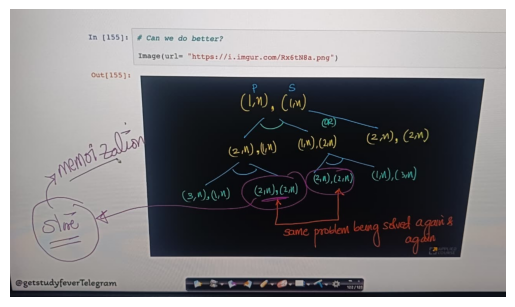

In [ ]:
# Worst cases Time complexity : T(n) = T(n-1) + T(n-1) = 2 * T(n-1)

# => T(n) = O(2^n) : try to do it better solution

from PIL import Image
import matplotlib.pyplot as plt 

image1 = Image.open("D:\LEARNING\Time_complexity.jpg")
image2 = Image.open("D:\LEARNING\\overlapping_recursion.jpg") # - can we do better ?

# plt.imshow(image1) # display image 1
plt.imshow(image2) # display image2
plt.axis("off") # hide axis

In [ ]:
print(isMatch("*", "ab"))
print(isMatch("", "")) 
print() # just for new line space 
print(isMatch("?a", "baa"))

* ab
True
 
True

?a baa
a aa
 a
True


In [ ]:
print(isMatch("a*", "ba"))

a* ba
False


(np.float64(-0.5), np.float64(1279.5), np.float64(653.5), np.float64(-0.5))

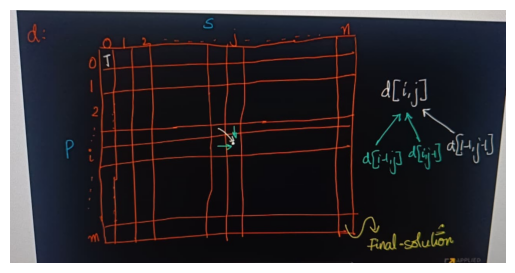

In [48]:
# for optimization Solution for Qno.4 : using  Dynamic Programming(DP)
# Overlapping sub-problem:
# why not store solutions to already solved problems in a 2D array of [0....m-1]  [0......n-1]

# Dynamic Programming : Recursion + Overlapping sub-problem

# We discussed this in our course when we learn back-proportion in DL.

# DO Not need to use recursion also now. Can solve iteratively.
from PIL import Image
import matplotlib.pyplot as plt 

image = Image.open("D:\LEARNING\DP_overview.jpg")
plt.imshow(image) # display image 
plt.axis("off") # hide axis
